<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

## DBSCAN and Clustering Examples

**COMPLETE THE TASKS IN BOLD BELOW:**

**TASK: Run the following cells to import the data and view the DataFrame.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Data/wholesome_customers_data.csv')

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


------

## EDA

**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

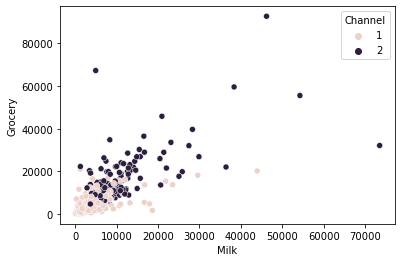

In [8]:
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel');

------

**TASK: Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?**

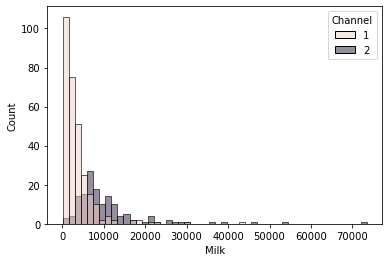

In [14]:
sns.histplot(data=df, x='Milk', hue='Channel');

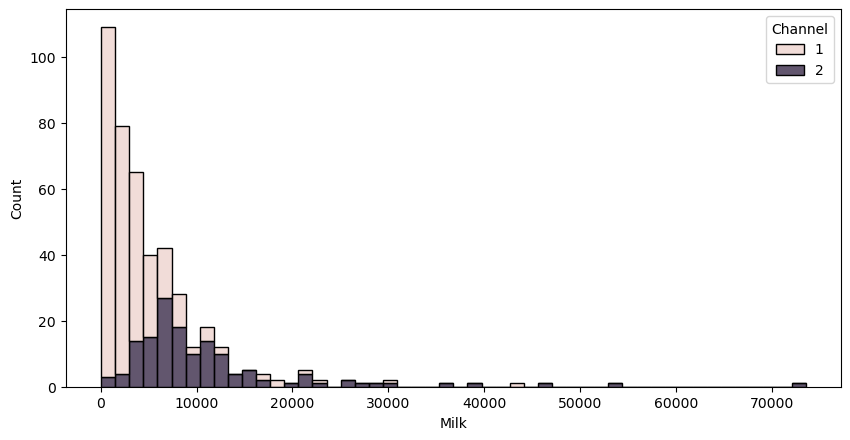

In [15]:
# stacking
plt.figure(figsize=(10,5), dpi=100)
sns.histplot(data=df, x='Milk', hue='Channel', multiple='stack');

We can see that Channel2 spending is much higher than Channel1.

Most of Channel1 spending in the lesser $ spending side, compared to Channel2.

-----

**TASK: Create an annotated clustermap of the correlations between spending on different cateogires.**

Correlation Between Spending Categories


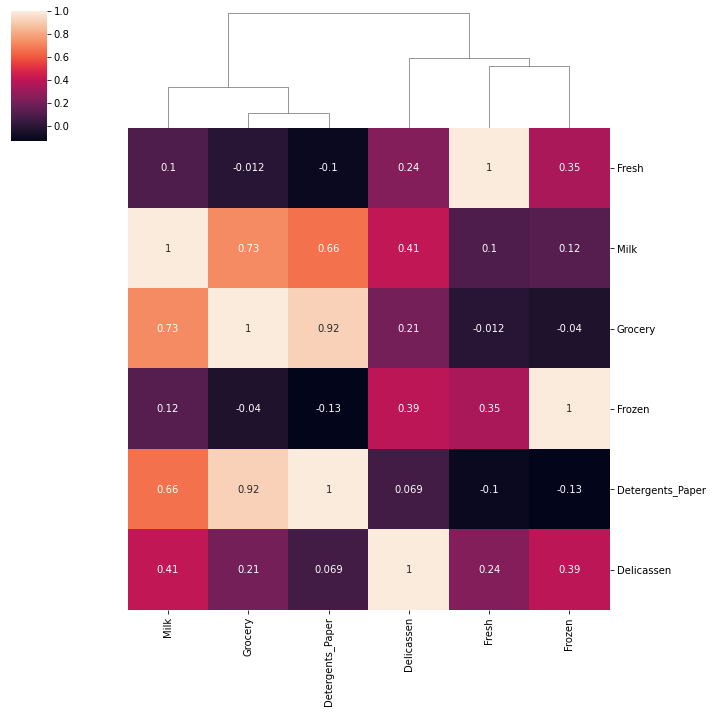

In [21]:
# this is only for Non-Categorical features

print('Correlation Between Spending Categories')
sns.clustermap(data=df.drop(['Region', 'Channel'], axis=1).corr(), annot=True, row_cluster=False);

# here we use row_cluster=False, as the information displayed in both rows and columns are esentitally the same.

----------

**TASK: Create a PairPlot of the dataframe, colored by Region.**

If we color by Region, we couldn't see clear distinction between regions.

The points are kinda overlapped on one another.

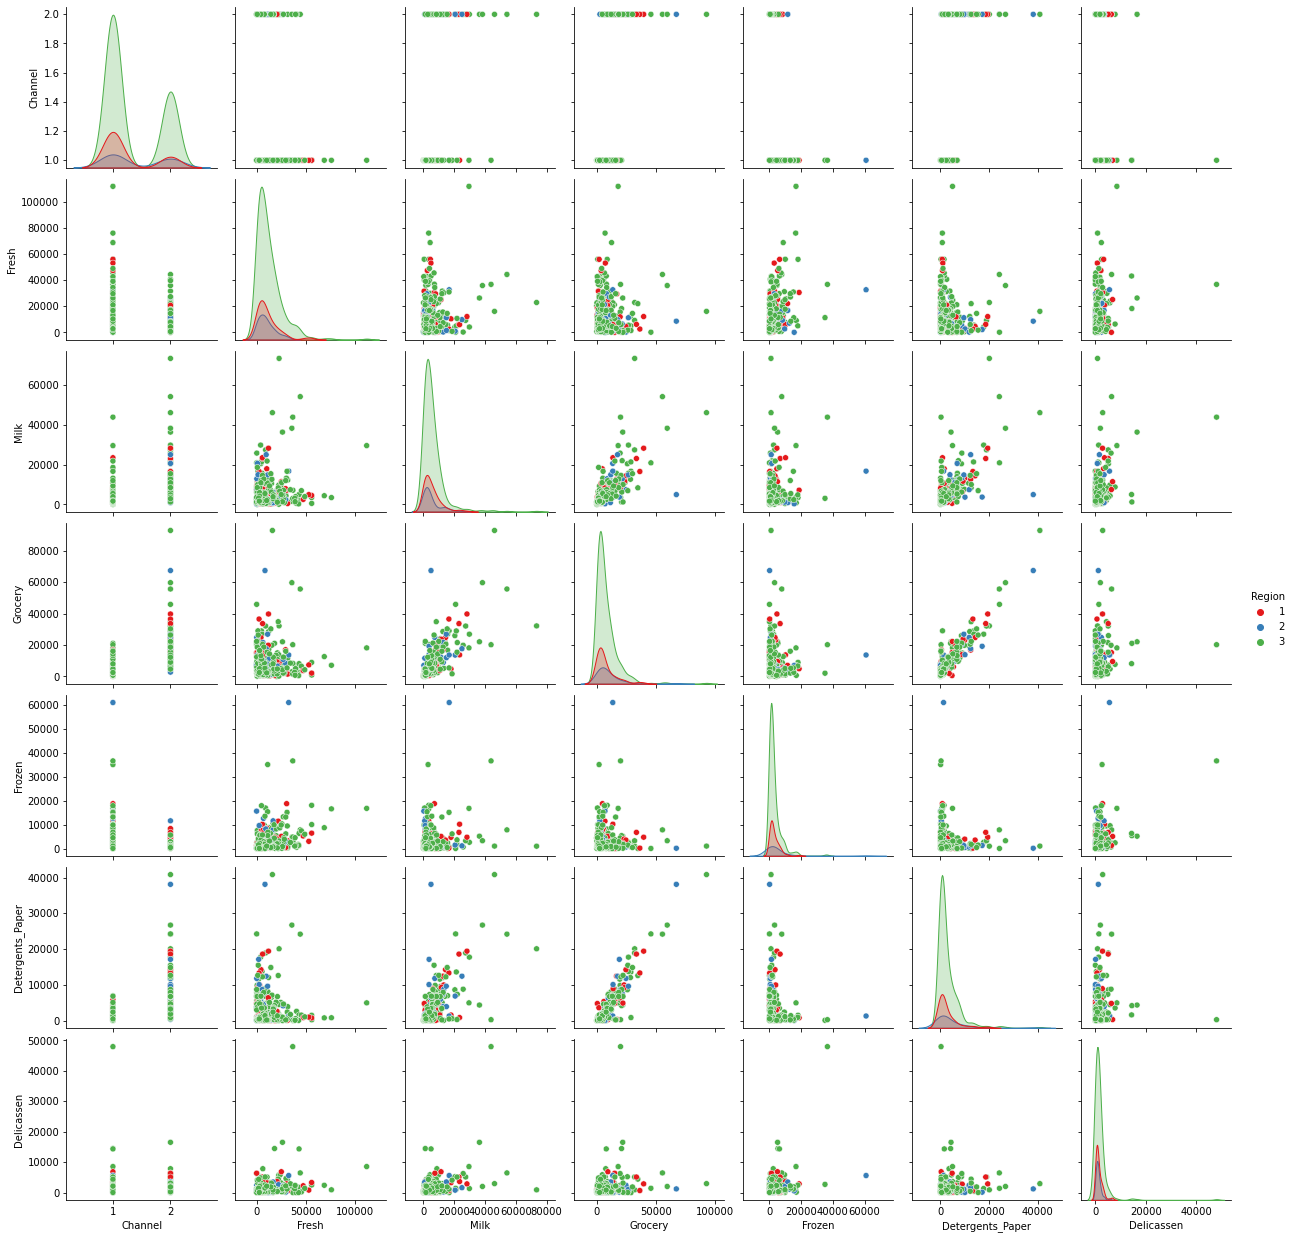

In [22]:
sns.pairplot(data=df, hue='Region', palette='Set1');

If we used Channel, we can see more distinction between Channels, which is different from Region.

So it seems like Channel is way more distinctive qualifier than Region.

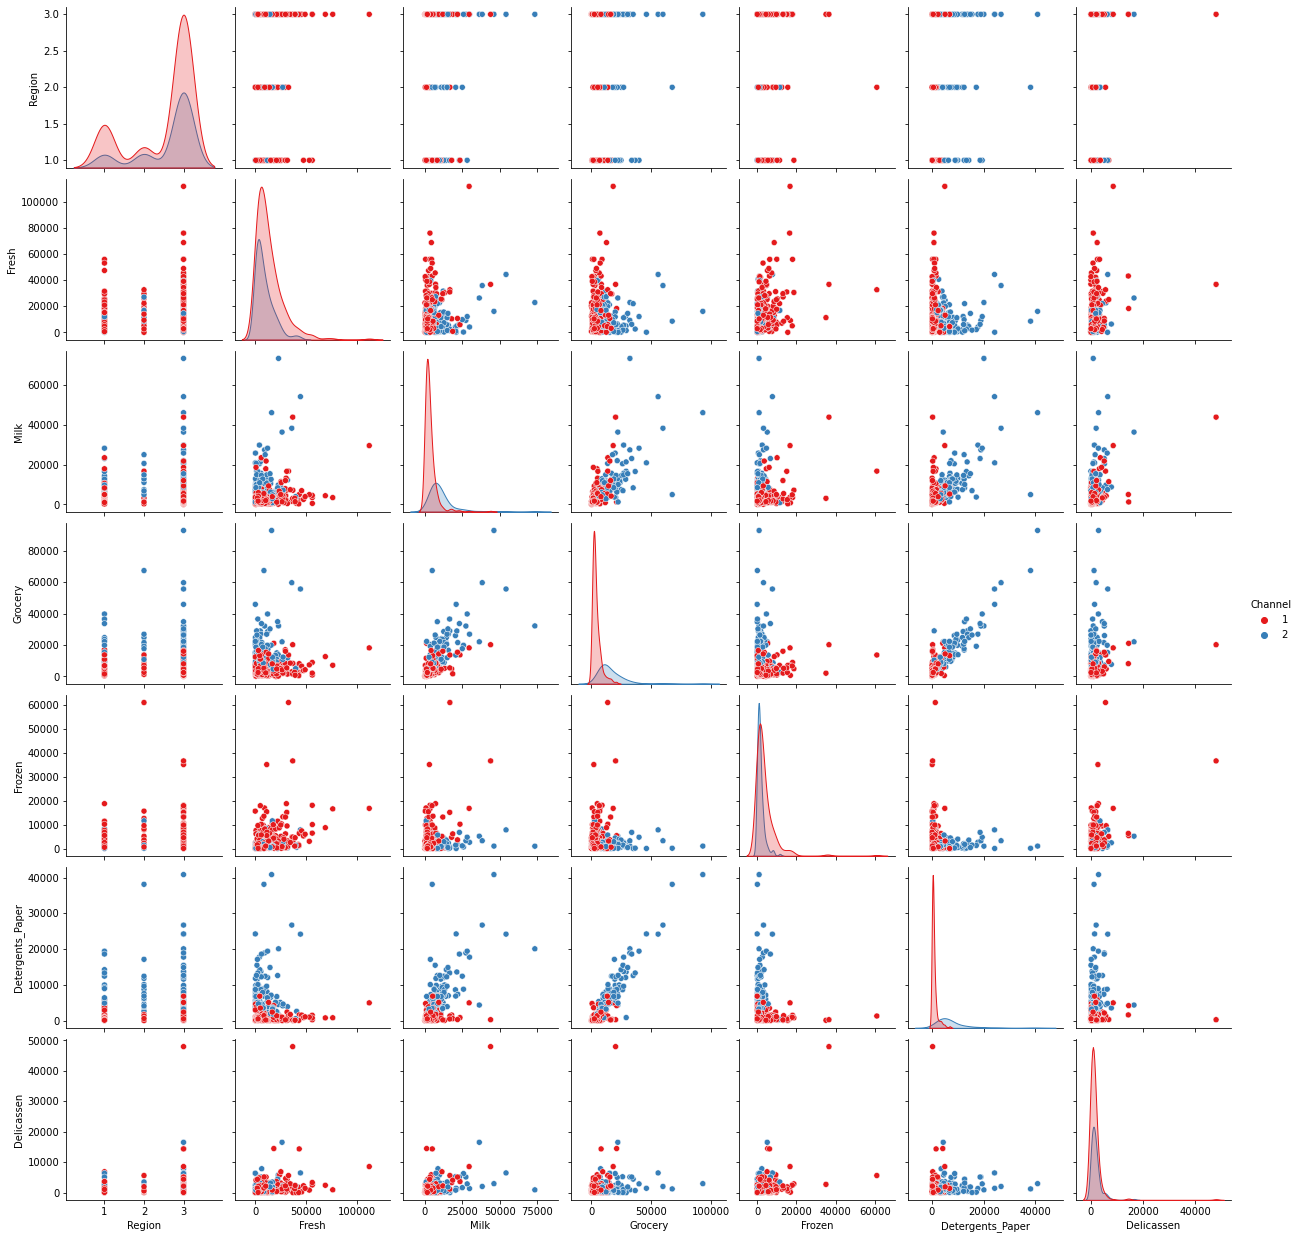

In [23]:
sns.pairplot(data=df, hue='Channel', palette='Set1');

----

## DBSCAN

In [34]:
df['Region'].unique()

array([3, 1, 2], dtype=int64)

In [36]:
df['Channel'].unique()

array([2, 1], dtype=int64)

As there are not many distinct `Region` and `Channel` values, we don't bother encoding them into dummy variables. So we will skip that step.


**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [37]:
scaled_X = scaler.fit_transform(df)

In [38]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

-------

**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [40]:
from sklearn.cluster import DBSCAN

In [46]:
# this is the elbow method that we will loop through different epsilon values.
number_of_outliers = []
percentage_of_outliers = []

# min_samples starting point: 2 * no.of dimension
min_samples = 2 * scaled_X.shape[1]

for eps in np.linspace(0.001, 3, 50):
    # model creation
    dbscan = DBSCAN(eps=eps,min_samples=min_samples)
    dbscan.fit(scaled_X)
    
    # Number of clusters
    number_of_outliers.append(np.sum(dbscan.labels_== -1))
    
    # Percentage of points classified as outliers
    perc_outliers = 100 * np.sum(dbscan.labels_==-1) / len(dbscan.labels_)
    percentage_of_outliers.append(perc_outliers)

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

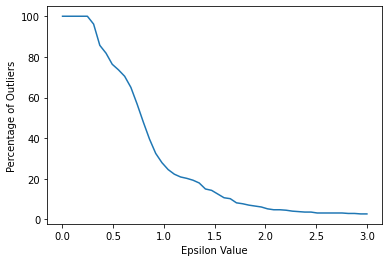

In [48]:
sns.lineplot(x=np.linspace(0.001, 3, 50), y=percentage_of_outliers);

plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Outliers');

As this point, we might want to consult the domain expect about what is the expected outlier percentage.

Then referring to the scatter plot in EDA, are we going to define which points are as ouliers, etc.

Or we can just rely on DBSCAN to guide us. If we refer to the line plot, we can see that around epsilon value of 2, the line is getting level out.

-----

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

In [51]:
min_samples = 2 * scaled_X.shape[1]

dbscan = DBSCAN(eps=2, min_samples=min_samples)

In [53]:
dbscan.fit(scaled_X)

DBSCAN(eps=2, min_samples=16)

-------

**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

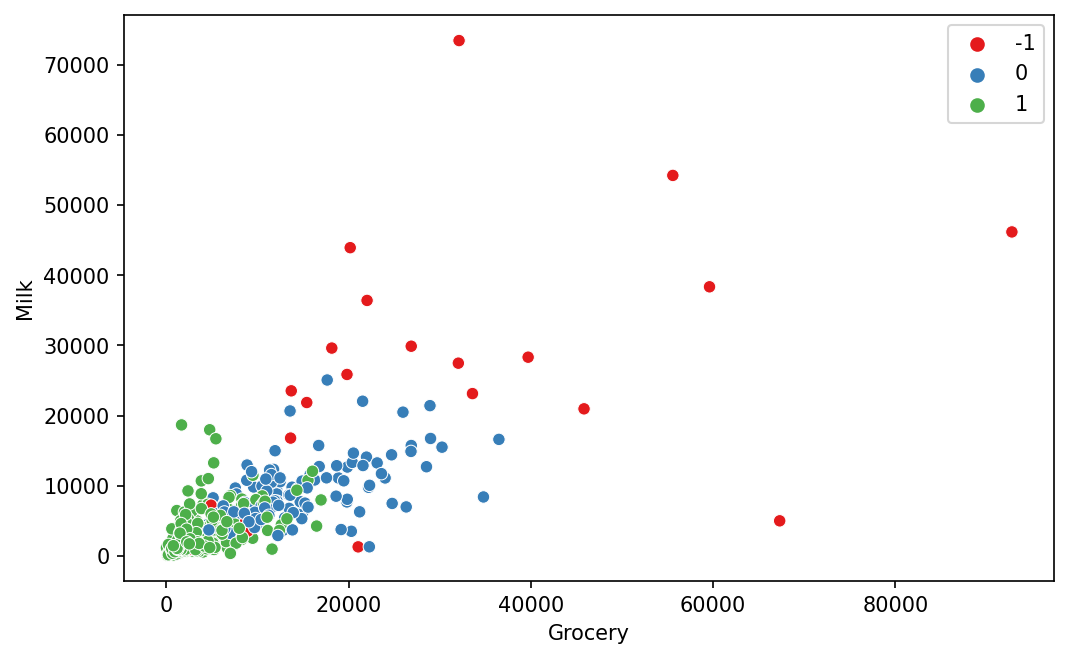

In [62]:
plt.figure(figsize=(8,5), dpi=150)
sns.scatterplot(data=df,x='Grocery',y='Milk',hue=dbscan.labels_, palette='Set1');

------

**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

In [63]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

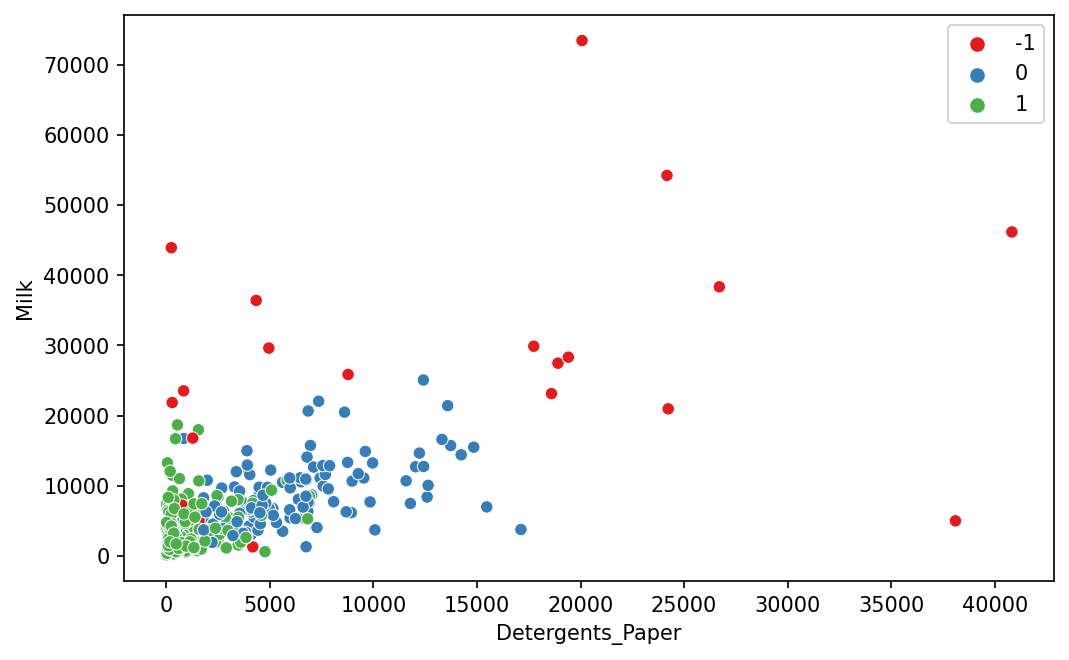

In [64]:
plt.figure(figsize=(8,5), dpi=150)
sns.scatterplot(data=df,x='Detergents_Paper',y='Milk',hue=dbscan.labels_, palette='Set1');

------

**TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

In [65]:
df['Labels'] = dbscan.labels_

In [66]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


-------

**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [74]:
cats_df = df.drop(['Channel', 'Region'], axis=1) # as we are only interested in certain Features, we will drop unnecessary ones

cat_means = cats_df.groupby('Labels').mean()
cat_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


Based on the heatmap, we can see that a lot of spending are made on Fresh, Milk and Grocery. 

And the outliers row (the first row) are the most spending in all item categories. We can see the color are much lighter.

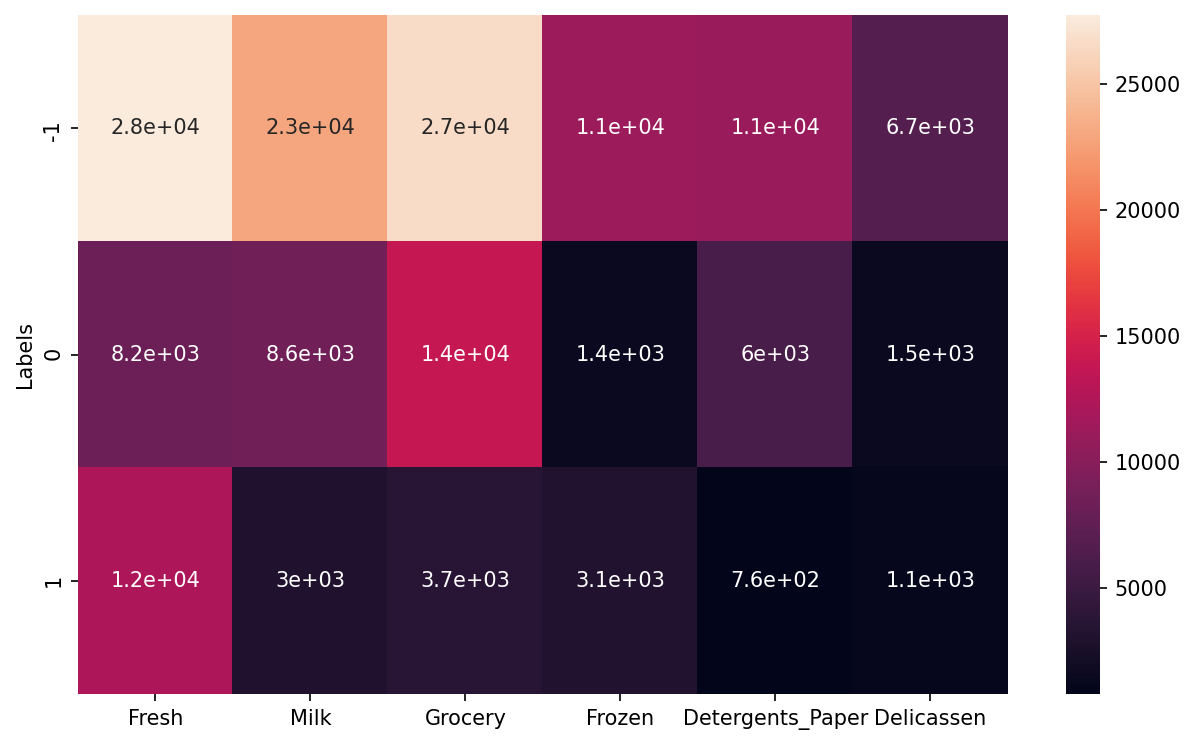

In [77]:
plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(cat_means, annot=True);

We can also focus on the two clusters (without the outlier row) as following.

Take note that we are now comparing between Cluster 0 and 1 only (Not the whole data, as outlier ones are not included).

Based on the figure, we can see that Cluter 1 is spending is way more on Milk than Cluster 0. However for Grocery Cluster 0 spending is much higher.

And their spending is pretty similar for Frozen and Declicassen.

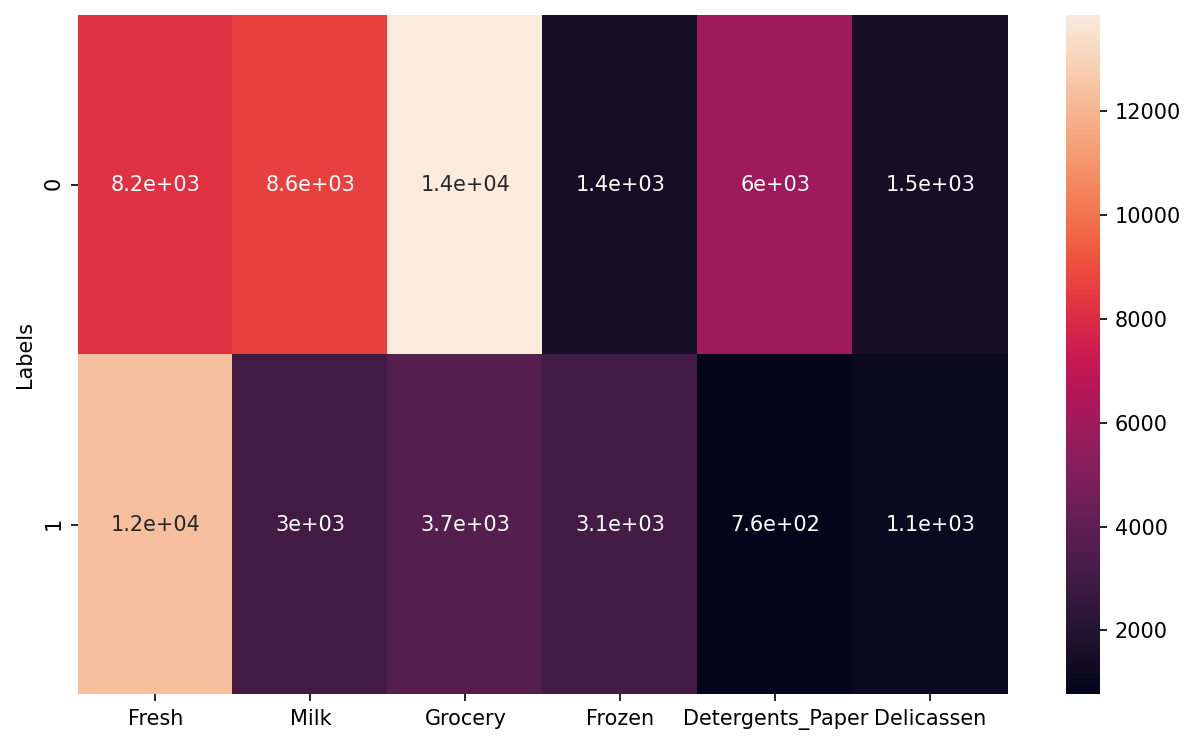

In [80]:
plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(cat_means.loc[[0, 1]], annot=True);

---

**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()

In [85]:
scaled_cat_means = scaler.fit_transform(cat_means)

In [87]:
scaled_cat_means

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [0.        , 0.28040821, 0.44455106, 0.        , 0.5000874 ,
        0.07374055],
       [0.2101965 , 0.        , 0.        , 0.1664745 , 0.        ,
        0.        ]])

In [89]:
# converting to DF to make it easier to view
scaled_cat_mean_df = pd.DataFrame(scaled_cat_means, cat_means.index, cat_means.columns)
scaled_cat_mean_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.280408,0.444551,0.000000,0.500087,0.073741
1,0.210196,0.000000,0.000000,0.166475,0.000000,0.000000


Based on the data above, We can immediately see the outliers are the highest spender.

And aslo we can see that Cluster 1 is the lower spender for Milk, Category, Detergents_Paper and Delicassen.

From heatmap, we can clearly see lowest spending and highet spending. For the outliers, the first row color (outliers) is now clearly changed to highest spending.

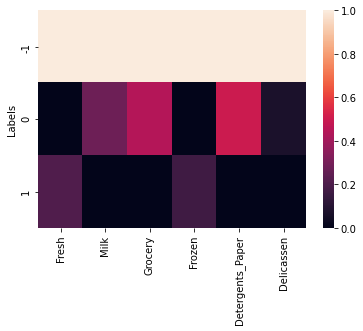

In [91]:
sns.heatmap(scaled_cat_mean_df);

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

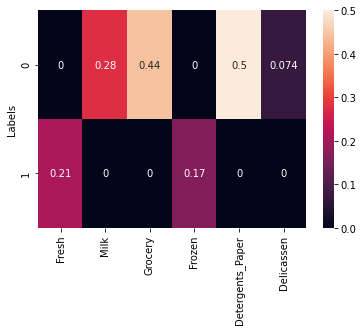

In [94]:
sns.heatmap(scaled_cat_mean_df.loc[[0, 1]], annot=True);

-------

**TASK: What spending category were the two clusters mode different in?**

We can see that `Detergents_Paper`category has the most different between Cluster 0 and Cluster 1.